In [1]:
import lab2_landmarks as l2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, log_loss, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import linear_model

Using TensorFlow backend.


First, we have to extract the features from each of the images and split them into training, validation, and test sets. Feature extraction is done using dlib, which I called from the lab2_landmarks file given in lab 2 of this course. Once the features had been extracted, I used scikit-learn to split the dataset into a 60-20-20 train-val-test split.

In [2]:
def get_data():
    X, y = l2.extract_features_labels()
    #Y = np.array([y, -(y - 1)]).T
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

    X_train_final = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
    X_val_final = X_val.reshape(X_val.shape[0],X_val.shape[1]*X_val.shape[2])
    X_test_final = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])

    return X_train_final, y_train, X_val_final, y_val, X_test_final, y_test

In [3]:
X_train, y_train, X_val, y_val, X_test, y_test = get_data()

In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(2877, 136)
(2877,)
(959, 136)
(959,)
(959, 136)
(959,)


In [5]:
def trainLR(training_images, training_labels, test_images, test_labels, lambd):
    classifier = linear_model.LogisticRegression(C=lambd, solver='liblinear', max_iter=100)
    classifier.fit(training_images, training_labels)
    pred = classifier.predict(test_images)
    
    #accuracy = accuracy_score(test_labels, pred)
    #print("Accuracy:", accuracy_score(test_labels, pred))
    #print(pred)
    
    return pred

In [6]:
def crossValidation(X_train, y_train, X_val, y_val):
    lambda_vec = np.array([0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10])
    
    error_train = np.zeros(len(lambda_vec))
    error_val = np.zeros(len(lambda_vec))
    
    for i in range(len(lambda_vec)):
        lambd = lambda_vec[i]
        y_train_pred = trainLR(X_train, y_train, X_train, y_train, lambd)
        y_val_pred = trainLR(X_train, y_train, X_val, y_val, lambd)
        
        error_train[i] = log_loss(y_train, y_train_pred)
        error_val[i] = log_loss(y_val, y_val_pred)

    print('Training Error:', error_train)
    print('Validation Error:', error_val)

    minErrorIndex = np.argmin(error_val)
    minError = np.amin(error_val)
    print('Min Validation Error Value:', minError)
    print('Ideal C Value:', lambda_vec[minErrorIndex])
    
    plt.plot(lambda_vec, error_train, label='Train')
    plt.plot(lambda_vec, error_val, label='Cross Validation')
    plt.legend()
    plt.xlabel('C')
    plt.ylabel('Error')
    plt.title('Validation Curve')
    plt.show()    
        
    return lambda_vec[minErrorIndex], minError

In [7]:
def learningCurve(X_train, y_train, X_val, y_val, lambd):
        m = X_train.shape[0]
        error_train = np.zeros(int(m/10))
        error_val = np.zeros(int(m/10))
        
        for i in range(10, m, 10):
            y_train_pred = trainLR(X_train[0:i], y_train[0:i], X_train[0:i], y_train[0:i], lambd)
            y_val_pred = trainLR(X_train[0:i], y_train[0:i], X_val, y_val, lambd)
            
            error_train[int((i-10)/10)] = log_loss(y_train[0:i], y_train_pred)
            error_val[int((i-10)/10)] = log_loss(y_val, y_val_pred)
            
        plt.plot(np.arange(10, m, 10), error_train, label='Train')
        plt.plot(np.arange(10, m, 10), error_val, label='Cross Validation')
        plt.legend()
        plt.xlabel('Number of Training Examples')
        plt.ylabel('Error')
        plt.title('Learning Curve')
        plt.show()
        
        return None

Training Error: [4.04577003 3.86569133 3.56556237 3.33746367 3.31345423 3.26543369
 3.30144938 3.26543313 3.25342772]
Validation Error: [3.74564997 3.67362082 3.74565331 3.92573285 3.9977645  4.06979615
 4.21386112 4.32190817 4.35792358]
Min Validation Error Value: 3.6736208222411593
Ideal C Value: 0.003


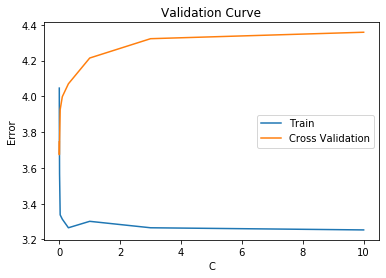

In [8]:
lambdaIdeal = crossValidation(X_train, y_train, X_val, y_val)[0]

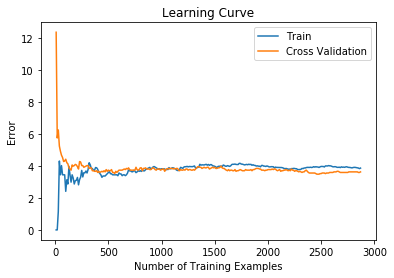

In [9]:
learningCurve(X_train, y_train, X_val, y_val, lambdaIdeal)

In [10]:
pred_train=trainLR(X_train, y_train, X_train, y_train, lambdaIdeal)
print('Accuracy:', accuracy_score(y_train, pred_train))
print(classification_report(y_train, pred_train))

Accuracy: 0.8880778588807786
              precision    recall  f1-score   support

         0.0       0.87      0.90      0.89      1398
         1.0       0.91      0.87      0.89      1479

    accuracy                           0.89      2877
   macro avg       0.89      0.89      0.89      2877
weighted avg       0.89      0.89      0.89      2877



In [11]:
pred_val=trainLR(X_train, y_train, X_val, y_val, lambdaIdeal)
print('Accuracy:', accuracy_score(y_val, pred_val))
print(classification_report(y_val, pred_val))

Accuracy: 0.8936392075078207
              precision    recall  f1-score   support

         0.0       0.91      0.88      0.89       481
         1.0       0.88      0.91      0.90       478

    accuracy                           0.89       959
   macro avg       0.89      0.89      0.89       959
weighted avg       0.89      0.89      0.89       959



In [12]:
%time pred_test=trainLR(X_train, y_train, X_test, y_test, lambdaIdeal)
print('Accuracy:', accuracy_score(y_test, pred_test))
print(classification_report(y_test, pred_test))

CPU times: user 278 ms, sys: 4.85 ms, total: 283 ms
Wall time: 145 ms
Accuracy: 0.8967674661105318
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89       463
         1.0       0.90      0.90      0.90       496

    accuracy                           0.90       959
   macro avg       0.90      0.90      0.90       959
weighted avg       0.90      0.90      0.90       959

